In [2]:
import time

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
# from model import Model
# from femnist.cnn import ClientModel
# from utils.model_utils import read_data
import pydash

pd.set_option('display.max_columns', 500)

In [3]:
IMAGE_SIZE = 28

In [4]:
from collections import defaultdict
def read_dir(data_dir):
    clients = []
    groups = []
    data = defaultdict(lambda : None)

    files = os.listdir(data_dir)
    files = [f for f in files if f.endswith('.json')]
    for f in files:
        file_path = os.path.join(data_dir,f)
        with open(file_path, 'r') as inf:
            cdata = json.load(inf)
        clients.extend(cdata['users'])
#         for idx, u in enumerate(cdata['users']):
#             cluster_ids[u] = cdata['cluster_ids'][idx]
        if 'hierarchies' in cdata:
            groups.extend(cdata['hierarchies'])
            print("hierarchies exist")
        data.update(cdata['user_data'])

    clients = list(sorted(data.keys()))
#     cluster_ids = [cluster_ids[c] for c in clients]
    return clients, groups, data

In [2]:
users_fixed=['f3713_40', 'f3911_34', 'f3900_35', 'f3657_40', 'f4050_05', 'f3941_08', 'f4064_46', 'f3650_20', 'f3979_36', 'f3643_29', 'f4041_39', 'f4042_33', 'f3826_07', 'f3676_37', 'f3856_34', 'f3722_39', 'f3952_40', 'f3753_43', 'f3727_12', 'f3656_42', 'f3974_03', 'f3890_40', 'f3653_40', 'f3652_48', 'f3906_44', 'f4008_34', 'f3850_20', 'f4098_19', 'f3993_05', 'f3891_31', 'f3637_45', 'f3881_31', 'f3800_17', 'f3733_48', 'f3601_49', 'f3768_02', 'f3607_15', 'f3973_27', 'f3751_39', 'f3686_49', 'f3731_07', 'f4006_12', 'f4083_30', 'f4049_18', 'f3720_15', 'f3966_01', 'f3925_41', 'f3848_28', 'f3981_38', 'f4093_35', 'f3857_01', 'f3861_21', 'f4059_48', 'f3808_45', 'f3635_09', 'f3699_41', 'f3996_02', 'f3627_46', 'f3678_17', 'f4026_43', 'f3682_45', 'f3750_00', 'f3633_29', 'f4057_40', 'f3873_37', 'f4058_09', 'f4001_45', 'f4046_46', 'f3718_40', 'f3692_49', 'f3605_17', 'f3689_09', 'f3701_44', 'f3896_07', 'f3623_42', 'f3797_07', 'f3700_25', 'f3866_43', 'f3972_19', 'f3702_47', 'f3985_04', 'f3779_49', 'f3834_35', 'f4066_22', 'f3724_32', 'f3841_01', 'f3926_17', 'f1907_22', 'f1740_04', 'f1576_04', 'f1714_49', 'f1985_18', 'f1686_01', 'f1769_04', 'f1874_36', 'f1685_23', 'f1648_00', 'f1887_23', 'f1721_26', 'f1820_17', 'f1669_41', 'f1939_13', 'f1811_11', 'f1964_32', 'f1521_17', 'f1798_42', 'f1567_20', 'f1933_13', 'f1850_16', 'f1773_18', 'f1816_24', 'f2076_31', 'f1781_48', 'f1532_16', 'f1625_05', 'f1634_38', 'f1878_33', 'f1577_15', 'f1776_35', 'f1515_36', 'f1982_16', 'f1849_46', 'f1744_39', 'f2031_31', 'f2071_28', 'f1896_13', 'f1967_21', 'f2013_19', 'f2088_14', 'f1614_22', 'f1779_01', 'f1715_20', 'f1930_02', 'f1890_28', 'f1954_31', 'f1642_04', 'f1720_48', 'f1770_47', 'f1613_27', 'f1710_15', 'f2001_42', 'f1619_37', 'f2098_02', 'f1731_34', 'f2052_11', 'f1504_10', 'f1553_24', 'f2068_36', 'f2042_30', 'f1689_07', 'f1857_48', 'f1942_21', 'f1610_32', 'f2017_03', 'f1785_07', 'f2066_29', 'f1639_38', 'f1659_04', 'f1696_08', 'f2484_76', 'f1705_41', 'f1579_11', 'f1975_00', 'f2065_28', 'f1970_32', 'f1697_45', 'f1795_30', 'f1936_06', 'f1900_12', 'f2177_57', 'f1702_13', 'f2002_29', 'f1656_24', 'f1525_00', 'f2099_21', 'f1732_28', 'f1644_01', 'f1983_00', 'f2041_22', 'f1988_11', 'f1605_44', 'f1683_30', 'f1801_01', 'f1530_18', 'f1916_32', 'f1908_49', 'f1596_10', 'f1921_33', 'f1845_02', 'f1836_34', 'f1531_34', 'f1877_30', 'f1551_34', 'f1670_20', 'f1786_08', 'f1955_30', 'f1994_21', 'f1931_49', 'f1570_40', 'f1562_13', 'f2021_30', 'f1629_49', 'f1772_12', 'f2070_11', 'f1706_39', 'f1728_02', 'f1892_07', 'f2045_15', 'f1581_39', 'f1802_35', 'f1999_37', 'f1627_25', 'f1777_29', 'f2091_28', 'f2051_15', 'f1691_07', 'f1764_25', 'f1960_26', 'f1864_10', 'f1735_22', 'f2534_96', 'f1895_37', 'f1925_00', 'f2038_08', 'f1586_22', 'f1593_46', 'f1980_17', 'f1617_41', 'f1859_39', 'f1518_07', 'f1861_26', 'f1536_05', 'f1676_30', 'f1545_40', 'f1708_22', 'f1956_19', 'f1528_18', 'f1972_15', 'f1707_05', 'f1624_03', 'f1762_28', 'f1951_19', 'f1945_00', 'f1638_14', 'f1949_20', 'f1824_18', 'f1815_44', 'f1950_08', 'f1865_30', 'f1630_21', 'f1947_49', 'f1694_17', 'f2082_26', 'f2064_33', 'f1998_10', 'f2007_45', 'f1703_29', 'f1641_09', 'f1927_01', 'f1741_16', 'f1813_25', 'f1806_29', 'f1559_25', 'f1535_20', 'f1963_27', 'f1884_05', 'f1550_34', 'f1783_34', 'f1791_04', 'f2077_16', 'f1585_06', 'f1958_33', 'f1651_06', 'f1737_09', 'f2018_05', 'f1505_21', 'f1932_09', 'f1660_07', 'f1941_44', 'f2029_03', 'f1580_14', 'f1977_23', 'f1510_28', 'f2019_34', 'f1595_34', 'f2094_44', 'f1502_33', 'f3711_08', 'f3664_18', 'f4011_12', 'f3918_03', 'f4040_28', 'f3804_08', 'f3835_39', 'f4037_48', 'f4044_44', 'f3742_12', 'f4088_26', 'f4082_29', 'f3879_35', 'f4099_10', 'f4036_01', 'f3999_42', 'f3851_19', 'f3739_34', 'f3663_13', 'f3908_41', 'f3734_01', 'f3802_05', 'f3817_22', 'f3855_47', 'f3944_02', 'f3840_05', 'f3662_24', 'f3951_33', 'f3741_12', 'f3938_46', 'f3923_00', 'f3721_04', 'f3811_12', 'f4085_42', 'f3764_37', 'f3717_48', 'f3791_09', 'f3980_34', 'f4024_12', 'f3983_27', 'f3789_16', 'f3626_35', 'f3877_11', 'f3947_36', 'f3905_45', 'f4056_41', 'f3810_05', 'f3794_17', 'f4089_12', 'f3917_03', 'f3871_42', 'f3796_14', 'f3649_28', 'f3625_17', 'f3827_08', 'f4060_46', 'f3644_26', 'f3833_03', 'f4091_23', 'f3641_13', 'f3830_48', 'f3766_48', 'f3854_08', 'f3960_19', 'f3893_01', 'f4096_14', 'f3620_07', 'f3770_21', 'f3697_32', 'f3880_29', 'f4002_46', 'f3914_30', 'f4073_38', 'f3786_04', 'f3870_03', 'f3913_01', 'f4003_07', 'f4062_17', 'f3661_19', 'f3756_06', 'f3862_40', 'f1904_33', 'f2003_18', 'f2073_06', 'f1846_45', 'f2010_38', 'f1673_32', 'f1868_06', 'f1594_09', 'f2053_20', 'f1834_16', 'f1873_22', 'f2033_24', 'f2022_38', 'f1870_30', 'f1885_29', 'f1957_41', 'f1507_20', 'f2090_00', 'f1835_27', 'f1898_09', 'f1752_29', 'f2030_28', 'f1768_48', 'f1664_04', 'f1643_46', 'f1993_19', 'f1565_04', 'f1649_03', 'f2012_46', 'f1628_45', 'f1979_36', 'f2034_14', 'f2055_31', 'f1513_07', 'f2078_03', 'f1742_04', 'f1541_40', 'f1805_13', 'f1583_41', 'f1688_24', 'f1679_05', 'f2056_40', 'f1587_05', 'f1546_05', 'f1796_21', 'f1758_36', 'f1962_12', 'f2043_25', 'f1831_15', 'f1658_04', 'f1839_31', 'f1986_20', 'f1989_45', 'f1855_37', 'f1926_49', 'f1701_10', 'f1575_36', 'f2005_01', 'f1543_08', 'f1803_09', 'f1667_29', 'f1830_16', 'f1852_35', 'f1922_38', 'f1734_48', 'f1763_25', 'f1089_04', 'f1487_45', 'f1077_48', 'f1154_00', 'f1349_00', 'f1014_23', 'f1092_01', 'f1336_30', 'f1085_29', 'f1120_05', 'f1411_01', 'f1443_09', 'f1324_40', 'f1017_30', 'f1194_03', 'f1195_27', 'f1231_36', 'f1260_34', 'f1208_33', 'f1177_42', 'f1210_47', 'f1116_09', 'f1312_23', 'f1122_02', 'f1080_00', 'f1007_22', 'f1233_46', 'f1212_39', 'f1337_29', 'f1029_30', 'f1407_18', 'f1474_13', 'f1456_41', 'f1206_36', 'f1391_35', 'f1166_04', 'f1376_43', 'f1225_06', 'f1494_41', 'f1004_07', 'f1440_10', 'f1374_18', 'f1373_33', 'f1132_19', 'f1016_36', 'f1167_31', 'f1468_04', 'f1473_30', 'f1229_25', 'f1471_42', 'f1093_13', 'f1221_17', 'f1109_36', 'f1121_47', 'f1124_24', 'f1238_43', 'f1056_11', 'f1165_30', 'f1278_22', 'f1226_13', 'f1115_26', 'f1067_20', 'f1128_24', 'f0435_37', 'f0112_07', 'f0242_22', 'f0119_44', 'f0005_26', 'f0043_10', 'f0039_14', 'f0271_05', 'f0031_02', 'f0044_12', 'f0383_43', 'f0125_02', 'f0149_15', 'f0107_06', 'f0356_41', 'f0207_46', 'f0157_12', 'f0065_00', 'f0329_34', 'f0178_39', 'f0203_21', 'f0463_09', 'f0002_01', 'f0069_14', 'f0198_18', 'f0070_14', 'f0211_26', 'f0318_44', 'f0444_34', 'f0208_05', 'f0168_36', 'f0111_36', 'f0171_26', 'f0050_10', 'f0297_05', 'f0167_33', 'f0126_41', 'f0384_36', 'f0249_46', 'f0405_20', 'f0068_00', 'f0310_32', 'f0431_36', 'f0205_15', 'f0441_00', 'f0162_02', 'f0089_16', 'f0137_14', 'f0020_08', 'f0285_23', 'f0333_01', 'f0155_13', 'f0181_31', 'f0250_37', 'f0374_13', 'f0420_19', 'f0298_13', 'f0316_21', 'f0312_43', 'f0467_18', 'f0287_15', 'f0077_13', 'f2372_55', 'f2103_60', 'f2548_84', 'f2262_83', 'f2106_66', 'f2535_60', 'f2258_85', 'f2288_58', 'f2498_75', 'f2433_75', 'f2259_68', 'f2486_95', 'f2215_69', 'f2418_82', 'f2126_57', 'f2183_59', 'f2507_78', 'f2392_80', 'f2214_70', 'f2406_72', 'f2248_68', 'f2112_65', 'f2597_88', 'f2212_74', 'f2416_80', 'f2201_80', 'f2574_64', 'f2448_94', 'f2145_89', 'f2351_74', 'f2369_56', 'f2307_62', 'f2277_92', 'f2357_70', 'f2454_73', 'f2216_66', 'f2107_53', 'f2245_95', 'f2578_68', 'f2321_84', 'f2210_96', 'f2583_71', 'f2110_56', 'f2557_98', 'f2346_88', 'f2233_79', 'f2569_58', 'f2343_83', 'f2438_76', 'f2113_94', 'f2400_61', 'f2165_54', 'f2111_87', 'f2355_85', 'f2441_83', 'f2205_74', 'f2560_93', 'f2114_50', 'f2260_57', 'f2169_69', 'f2211_73', 'f2596_86', 'f2572_63', 'f2434_59', 'f2386_82', 'f2142_69', 'f2273_84', 'f2460_52', 'f2197_62', 'f2520_64', 'f2461_99', 'f2500_50', 'f2366_64', 'f2131_73', 'f2203_77', 'f2290_64', 'f2200_55', 'f2138_72', 'f1917_19', 'f2084_07', 'f2072_32', 'f1743_33', 'f1636_00', 'f1666_45', 'f1652_11', 'f2061_12', 'f1919_17', 'f1841_05', 'f1754_35', 'f1534_32', 'f1778_11', 'f1817_18', 'f1647_28', 'f1674_35', 'f1797_27', 'f2060_18', 'f1832_47', 'f1920_09', 'f1935_07', 'f1564_43', 'f1539_20', 'f1519_36', 'f2054_13', 'f1549_10', 'f1787_36', 'f1609_27', 'f1718_29', 'f1833_03', 'f1635_40', 'f1875_21', 'f1578_22', 'f1680_37', 'f1750_06', 'f1748_30', 'f2050_45', 'f1602_35', 'f1881_37', 'f1722_43', 'f1522_45', 'f1952_17', 'f1582_49', 'f1886_18', 'f1827_17', 'f1538_15', 'f1598_49', 'f1622_16', 'f1978_04', 'f2028_18', 'f1738_42', 'f1858_21', 'f1533_23', 'f1807_08', 'f1608_37', 'f2009_39', 'f1788_32', 'f1766_41', 'f1506_35', 'f1724_42', 'f1524_26', 'f1800_08', 'f1591_47', 'f1695_12', 'f1681_44', 'f1746_28', 'f1837_00', 'f3158_03', 'f3211_20', 'f3395_44', 'f3518_46', 'f3441_24', 'f3580_22', 'f3272_48', 'f3222_24', 'f3415_33', 'f3264_06', 'f3509_42', 'f3369_37', 'f3401_42', 'f3412_27', 'f3339_15', 'f3292_31', 'f3507_42', 'f3273_45', 'f3216_33', 'f3392_06', 'f3137_47', 'f3353_33', 'f3531_27', 'f3166_12', 'f3265_08', 'f3578_27', 'f3508_31', 'f3461_23', 'f3117_11', 'f3521_09', 'f3581_23', 'f3186_24', 'f3157_23', 'f3300_25', 'f3588_33', 'f3370_37', 'f3315_23', 'f3571_20', 'f3364_36', 'f3317_25', 'f3523_31', 'f3198_32', 'f3540_36', 'f3419_33', 'f3103_38', 'f3347_47', 'f3572_03', 'f3253_11', 'f3310_44', 'f3263_08', 'f3420_27', 'f3243_44', 'f3147_41', 'f3561_09', 'f3330_43', 'f3544_20', 'f3199_08', 'f3289_18', 'f3124_21', 'f4020_15', 'f3356_11', 'f3524_43', 'f3532_39', 'f3427_21', 'f3597_18', 'f3133_33', 'f0382_03', 'f0443_21', 'f0133_23', 'f0283_31', 'f0481_47', 'f0061_45', 'f0284_34', 'f0006_12', 'f0304_23', 'f0263_31', 'f0045_12', 'f0476_07', 'f0063_38', 'f0166_12', 'f0011_13', 'f0158_20', 'f0448_39', 'f0330_09', 'f0292_16', 'f0367_33', 'f0132_17', 'f0464_48', 'f0217_16', 'f0488_39', 'f0118_07', 'f0164_32', 'f0454_20', 'f0442_00', 'f0434_21', 'f0389_38', 'f0451_44', 'f0151_02', 'f0259_41', 'f0362_44', 'f0047_00', 'f0048_00', 'f0138_30', 'f0123_28', 'f0372_33', 'f0332_15', 'f0458_38', 'f0428_41', 'f0224_06', 'f0487_42', 'f0261_06', 'f0480_41', 'f0265_39', 'f0082_40', 'f0218_04', 'f0100_42', 'f0009_06', 'f0445_46', 'f0499_10', 'f0394_00', 'f0239_15', 'f0072_36', 'f0246_12', 'f0064_04', 'f0446_03', 'f0081_26', 'f0293_40', 'f0237_46', 'f0073_45', 'f0214_05', 'f0305_08', 'f0260_38', 'f0326_35', 'f0324_42', 'f0059_21', 'f0469_20', 'f0046_20', 'f0143_00', 'f0130_28', 'f0360_15', 'f0022_10', 'f0141_43', 'f0351_22', 'f0254_46', 'f0105_03', 'f0274_49', 'f0413_09', 'f0460_02', 'f0433_14', 'f0361_07', 'f0289_10', 'f0029_05', 'f0199_01', 'f0131_03', 'f0221_37', 'f0041_30', 'f0272_13', 'f0067_25', 'f0234_16', 'f0450_41', 'f0184_49', 'f0003_42', 'f0038_42', 'f0352_09', 'f0353_18', 'f0076_06', 'f0470_37', 'f0191_22', 'f0363_43', 'f0391_32', 'f0281_47', 'f0117_11', 'f0288_48', 'f0091_26', 'f0248_43', 'f0277_33', 'f0459_12', 'f0170_40', 'f0267_24', 'f0229_10', 'f0241_46', 'f0276_07', 'f0156_09', 'f0161_16', 'f0340_05', 'f0008_45', 'f0083_09', 'f0129_32', 'f0080_14', 'f0236_17', 'f0422_45', 'f0115_34', 'f0415_28', 'f0095_41', 'f3478_49', 'f3410_19', 'f3162_20', 'f3118_09', 'f3510_43', 'f3282_28', 'f3530_32', 'f3423_29', 'f3146_14', 'f3188_47', 'f3113_40', 'f3275_40', 'f3483_16', 'f3394_37', 'f3302_29', 'f3398_06', 'f3591_14', 'f3583_09', 'f3589_24', 'f3592_19', 'f3505_39', 'f3337_21', 'f3440_33', 'f3411_09', 'f3596_19', 'f3134_27', 'f3115_25', 'f3444_07', 'f3528_35', 'f3252_32', 'f3362_03', 'f3304_23', 'f3290_01', 'f3119_39', 'f3159_16', 'f3460_47', 'f3593_26', 'f3111_05', 'f3268_37', 'f3107_16', 'f3156_26', 'f3173_48', 'f3298_12', 'f3519_18', 'f3426_23', 'f3138_46', 'f3307_33', 'f3433_10', 'f3373_36', 'f3443_42', 'f3447_20', 'f3187_33', 'f3543_29', 'f3312_28', 'f3435_24', 'f3140_49', 'f3349_22', 'f3467_12', 'f3402_08', 'f3325_08', 'f3501_06', 'f3322_40', 'f3438_08', 'f3324_05', 'f3286_40', 'f3579_30', 'f3390_07', 'f3280_34', 'f3129_16', 'f3343_18', 'f3477_45', 'f3136_07', 'f3385_08', 'f3408_47', 'f3436_22', 'f3357_06', 'f1137_07', 'f1404_39', 'f1295_00', 'f1033_07', 'f1170_00', 'f1339_22', 'f1255_13', 'f1458_19', 'f1311_39', 'f1387_23', 'f1008_28', 'f1431_47', 'f1284_38', 'f1134_40', 'f1298_29', 'f1235_34', 'f1072_34', 'f1039_40', 'f1321_40', 'f1305_42', 'f1436_39', 'f1084_48', 'f1286_47', 'f1316_31', 'f1409_25', 'f1118_23', 'f1292_22', 'f1043_42', 'f1309_08', 'f1103_38', 'f1002_33', 'f1196_16', 'f1361_36', 'f1442_28', 'f1465_32', 'f1389_01', 'f1019_45', 'f1390_10', 'f1040_01', 'f1364_24', 'f1353_42', 'f1042_08', 'f1444_03', 'f1462_01', 'f1164_21', 'f1143_43', 'f1187_49', 'f1088_00', 'f1438_26', 'f1323_11', 'f1174_47', 'f1448_42', 'f1330_35', 'f3606_19', 'f3977_39', 'f3738_16', 'f3615_49', 'f3712_14', 'f3755_33', 'f3936_41', 'f3992_46', 'f3675_24', 'f3785_26', 'f3677_29', 'f3955_03', 'f3838_46', 'f4086_36', 'f3832_04', 'f3749_27', 'f3935_48', 'f3659_25', 'f3660_26', 'f3946_04', 'f3683_06', 'f3958_42', 'f3694_44', 'f3793_06', 'f3780_30', 'f3987_13', 'f3837_30', 'f3968_18', 'f4055_44', 'f3761_12', 'f3836_27', 'f3725_39', 'f3930_25', 'f3790_48', 'f3658_27', 'f3989_21', 'f3719_06', 'f3732_30', 'f3693_03', 'f3920_08', 'f3668_33', 'f4025_17', 'f3616_07', 'f3895_38', 'f3695_42', 'f4068_21', 'f4029_29', 'f3760_06', 'f3781_28', 'f3803_39', 'f3684_46', 'f3730_33', 'f3628_27', 'f3886_02', 'f3774_21', 'f3876_02', 'f3990_02', 'f3899_30', 'f3819_19', 'f3932_35', 'f3743_12', 'f3646_15', 'f3894_37', 'f3986_31', 'f3843_30', 'f4027_34', 'f3610_45', 'f3618_26', 'f3698_01', 'f3709_31', 'f3812_06', 'f3825_12', 'f3645_14', 'f3671_04', 'f3902_40', 'f3600_46', 'f3949_09', 'f3875_35', 'f3940_26', 'f3976_36', 'f3603_14', 'f3844_11', 'f3696_44', 'f3822_47', 'f3665_22', 'f3878_43', 'f3636_24', 'f3735_09', 'f4034_28', 'f3759_43', 'f4069_03', 'f4065_47', 'f3907_43', 'f3632_10', 'f3994_27', 'f4087_40', 'f4018_10', 'f3745_12', 'f4000_40', 'f3619_19', 'f3953_28', 'f3763_41', 'f3998_40', 'f3609_24', 'f4021_01', 'f3728_28', 'f3970_25', 'f3714_05', 'f3912_15', 'f3863_30', 'f3614_06', 'f3667_35', 'f3984_32', 'f3723_03', 'f3784_14', 'f3816_24', 'f3608_13', 'f3945_00', 'f3971_41', 'f3961_03', 'f3778_23', 'f3982_48', 'f4030_29', 'f3685_08', 'f4072_44', 'f3919_18', 'f3758_19', 'f3916_23', 'f3680_36', 'f3847_24', 'f3892_07', 'f3888_32', 'f3824_05', 'f3867_42', 'f3897_45', 'f3775_12', 'f3762_40', 'f3883_18', 'f3934_45', 'f3964_40', 'f4022_12', 'f3839_11', 'f4092_24', 'f3765_44', 'f3933_30', 'f4077_42', 'f4017_11', 'f3672_20', 'f3868_35', 'f3821_06', 'f4054_12', 'f4078_05', 'f4016_16', 'f4028_44', 'f3746_12', 'f4084_14', 'f3679_06', 'f4015_05', 'f4094_49', 'f3654_03', 'f3874_15', 'f3613_20', 'f4063_09', 'f3729_27', 'f3655_18', 'f3884_40', 'f4014_43', 'f3736_09', 'f4045_31', 'f3673_48', 'f3617_43', 'f3737_46', 'f3799_11', 'f3757_19', 'f4053_14', 'f3924_24', 'f3631_34', 'f4038_15', 'f3967_43', 'f3798_08', 'f3978_35', 'f4023_00', 'f3846_02', 'f4004_35', 'f3860_20', 'f3957_18', 'f3942_06', 'f3909_46', 'f3773_14', 'f3771_15', 'f3849_21', 'f4075_12', 'f3787_15', 'f3806_01', 'f3639_43', 'f3828_24', 'f3950_44', 'f4095_43', 'f3687_48', 'f3815_34', 'f3604_21', 'f3707_32', 'f4010_12', 'f3651_18', 'f3611_14', 'f3889_26', 'f4005_01', 'f4052_33', 'f3740_01', 'f3903_05', 'f0727_27', 'f0652_30', 'f0715_08', 'f0655_10', 'f0578_14', 'f0596_26', 'f0691_00', 'f0568_00', 'f0962_04', 'f0794_31', 'f0943_40', 'f0658_30', 'f0927_44', 'f0817_40', 'f0527_23', 'f0855_46', 'f0768_20', 'f0994_46', 'f0594_00', 'f0993_30', 'f0840_37', 'f0760_23', 'f0630_16', 'f0751_28', 'f0936_34', 'f0880_16', 'f0552_46', 'f0826_18', 'f0957_15', 'f0695_31', 'f0622_25', 'f0625_26', 'f0686_09', 'f0976_41', 'f0637_21', 'f0544_05', 'f0548_49', 'f0857_21', 'f0517_23', 'f0750_18', 'f0888_25', 'f0959_27', 'f0599_04', 'f0791_04', 'f0650_31', 'f0933_38', 'f0770_45', 'f0866_22', 'f0941_49', 'f0967_29', 'f0597_00', 'f0996_01', 'f0841_10', 'f0789_10', 'f0667_05', 'f0609_12', 'f0883_14', 'f0542_10', 'f0671_18', 'f0519_46', 'f0697_31', 'f3201_07', 'f3377_11', 'f3270_11', 'f3207_05', 'f3202_01', 'f3106_05', 'f3291_47', 'f3536_49', 'f3152_47', 'f3378_44', 'f3471_02', 'f3260_09', 'f3575_04', 'f3550_07', 'f3462_15', 'f3204_15', 'f3341_29', 'f3375_30', 'f3388_36', 'f3389_44', 'f3403_48', 'f3237_27', 'f3238_40', 'f3599_19', 'f3297_22', 'f3574_30', 'f3431_32', 'f3560_17', 'f3594_23', 'f3218_23', 'f3525_29', 'f3430_38', 'f3425_47', 'f3506_22', 'f3405_07', 'f3439_44', 'f3279_28', 'f3495_01', 'f3122_40', 'f3184_11', 'f3538_29', 'f3576_04', 'f3549_47', 'f3421_31', 'f3361_17', 'f3116_03', 'f3295_35', 'f3110_25', 'f3554_18', 'f3380_04', 'f3177_03', 'f3230_21', 'f3284_38', 'f3195_04', 'f3494_34', 'f3233_02', 'f3329_30', 'f3179_39', 'f3514_20', 'f3316_22', 'f3148_21', 'f3400_08', 'f3217_28', 'f3336_15', 'f3499_36', 'f3178_23', 'f3355_36', 'f3210_22', 'f3414_29', 'f3309_37', 'f3259_15', 'f3422_32', 'f3193_08', 'f3344_26', 'f3418_34', 'f3149_41', 'f3406_49', 'f3424_24', 'f3350_11', 'f3479_08', 'f3145_38', 'f3569_18', 'f3127_16', 'f3551_12', 'f3448_15', 'f3345_12', 'f3564_08', 'f3277_09', 'f3328_45', 'f3200_41', 'f3132_12', 'f3563_46', 'f3360_00', 'f3333_15', 'f3326_06', 'f3598_35', 'f3142_38', 'f3281_27', 'f3354_29', 'f3488_35', 'f3469_10', 'f3445_01', 'f3452_13', 'f3235_00', 'f3475_09', 'f3555_14', 'f3384_26', 'f3374_38', 'f3515_26', 'f3175_03', 'f3109_30', 'f3498_04', 'f3442_00', 'f3463_16', 'f3383_24', 'f3453_15', 'f3529_11', 'f3247_40', 'f3490_39', 'f3266_12', 'f3257_17', 'f3285_15', 'f3396_07', 'f3181_10', 'f3553_12', 'f3164_09', 'f3171_30', 'f3301_38', 'f3526_34', 'f3143_04', 'f3126_20', 'f3348_00', 'f3267_41', 'f3489_38', 'f3359_42', 'f3539_44', 'f3486_00', 'f3150_21', 'f3194_31', 'f3305_28', 'f3196_35', 'f3214_03', 'f3225_26', 'f3250_14', 'f3502_45', 'f3391_40', 'f3191_43', 'f1179_01', 'f1384_42', 'f1011_35', 'f1479_40', 'f1091_00', 'f1074_34', 'f1325_20', 'f1057_34', 'f1082_22', 'f1049_26', 'f1263_18', 'f1026_41', 'f1426_27', 'f1340_02', 'f1133_00', 'f1024_46', 'f1169_08', 'f1041_18', 'f1242_30', 'f1382_07', 'f1307_25', 'f1272_09', 'f1012_30', 'f1050_39', 'f1310_44', 'f1113_16', 'f1248_28', 'f1275_19', 'f1181_27', 'f1466_48', 'f1315_48', 'f1097_20', 'f1123_09', 'f1317_00', 'f1354_22', 'f1482_39', 'f1171_06', 'f1193_46', 'f1470_34', 'f1481_35', 'f1190_46', 'f1434_10', 'f1129_22', 'f1119_27', 'f1342_17', 'f1184_21', 'f1237_18', 'f1379_47', 'f1455_14', 'f1234_26', 'f1065_10', 'f1335_30', 'f0572_15', 'f0843_06', 'f0834_03', 'f0693_40', 'f0560_16', 'f0812_32', 'f0581_30', 'f0670_02', 'f0566_02', 'f0612_11', 'f0764_08', 'f0914_27', 'f0606_11', 'f0694_49', 'f0781_31', 'f0912_01', 'f0636_12', 'f0704_31', 'f0747_24', 'f0717_46', 'f0535_19', 'f0724_37', 'f0629_39', 'f0589_20', 'f0891_44', 'f0897_19', 'f0992_04', 'f0899_05', 'f0689_06', 'f0577_19', 'f0974_14', 'f0647_19', 'f0995_43', 'f0663_30', 'f0545_49', 'f0719_05', 'f0876_43', 'f0929_23', 'f0784_30', 'f0997_34', 'f0511_03', 'f0610_38', 'f0595_35', 'f0800_00', 'f0582_44', 'f0757_24', 'f0646_22', 'f0564_43', 'f0682_48', 'f0991_47', 'f0890_35', 'f0728_14', 'f0567_25', 'f0828_34', 'f0988_45', 'f0934_12', 'f0524_04', 'f0684_13', 'f0505_13', 'f0674_44', 'f0551_15', 'f0666_20', 'f0886_40', 'f0735_17', 'f0590_06', 'f2109_65', 'f2224_82', 'f2582_70', 'f2579_76', 'f2479_65', 'f2391_85', 'f2100_97', 'f2525_62', 'f2427_89', 'f2196_58', 'f2280_57', 'f2501_53', 'f2544_53', 'f2472_83', 'f2556_97', 'f2491_71', 'f2249_75', 'f2293_68', 'f2181_63', 'f2536_59', 'f2485_77', 'f2283_59', 'f2481_58', 'f2299_91', 'f2135_53', 'f2108_54', 'f2136_68', 'f2300_52', 'f2529_70', 'f2247_97', 'f2318_78', 'f2480_61', 'f2220_72', 'f2305_60', 'f2320_75', 'f2545_52', 'f2509_53', 'f2347_58', 'f2512_54', 'f2130_74', 'f2471_82', 'f2152_98', 'f2470_80', 'f2458_53', 'f2284_51', 'f2217_71', 'f2546_62', 'f2137_90', 'f2223_83', 'f2591_70', 'f2164_60', 'f2409_51', 'f0525_15', 'f2598_92', 'f2338_70', 'f2487_92', 'f2430_92', 'f2376_57', 'f2580_69', 'f2549_82', 'f2477_69', 'f0491_35', 'f0365_07', 'f0402_38', 'f0098_33', 'f0231_43', 'f0012_39', 'f0489_49', 'f0314_27', 'f0286_16', 'f0175_47', 'f0049_32', 'f0266_14', 'f0062_25', 'f0037_16', 'f0194_30', 'f0366_08', 'f0359_05', 'f0153_35', 'f0268_19', 'f0210_17', 'f0453_45', 'f0273_27', 'f0253_40', 'f0295_17', 'f0215_32', 'f0368_39', 'f0417_44', 'f0255_48', 'f0452_37', 'f0350_03', 'f0172_40', 'f0051_42', 'f0397_27', 'f0228_36', 'f0414_22', 'f0325_17', 'f0035_19', 'f0373_35', 'f0187_18', 'f0343_35', 'f0303_00', 'f0188_36', 'f0004_09', 'f0328_12', 'f0408_03', 'f0088_22', 'f0291_06', 'f1500_25', 'f2092_41', 'f1508_14', 'f1940_28', 'f1937_04', 'f1700_36', 'f2026_32', 'f1905_23', 'f1943_00', 'f1775_42', 'f1991_47', 'f1698_35', 'f1856_37', 'f2032_22', 'f1603_40', 'f1909_43', 'f1851_06', 'f1765_33', 'f1842_34', 'f1612_47', 'f1753_34', 'f2089_25', 'f1690_24', 'f1569_23', 'f1968_09', 'f2096_00', 'f1631_40', 'f2062_39', 'f1894_39', 'f1774_40', 'f2016_39', 'f1709_03', 'f1654_46', 'f1672_35', 'f2086_25', 'f1757_24', 'f1711_35', 'f2008_26', 'f1883_03', 'f1584_28', 'f1739_23', 'f1590_15', 'f1891_18', 'f1704_29', 'f1879_44', 'f1882_40', 'f1552_32', 'f1645_35', 'f2093_26', 'f1976_25', 'f2014_07', 'f1987_47', 'f1910_05', 'f1860_06', 'f2059_42', 'f1601_01', 'f1755_46', 'f1514_35', 'f1902_10', 'f2085_02', 'f1600_43', 'f1840_35', 'f2156_56', 'f2554_55', 'f2121_67', 'f2192_56', 'f2188_71', 'f2396_91', 'f2436_53', 'f2337_71', 'f2204_78', 'f2358_71', 'f2517_63', 'f2238_86', 'f2285_54', 'f2254_72', 'f2342_82', 'f2140_77', 'f2143_66', 'f2397_92', 'f2207_75', 'f2384_51', 'f2426_87', 'f2374_59', 'f2447_93', 'f2378_69', 'f2368_50', 'f2442_81', 'f2345_87', 'f2587_73', 'f2570_52', 'f2329_94', 'f2559_95', 'f2541_99', 'f2198_58', 'f2264_82', 'f2334_99', 'f2445_82', 'f2530_91', 'f2139_75', 'f2516_59', 'f2263_79', 'f2356_86', 'f2402_75', 'f2571_62', 'f2497_54', 'f2379_68', 'f2141_85', 'f2244_94', 'f2256_71', 'f2562_90', 'f2122_65', 'f2551_80', 'f2462_98', 'f2287_60', 'f2324_84', 'f2467_77', 'f2311_61', 'f2308_56', 'f2199_64', 'f2502_59', 'f2573_61', 'f2543_98', 'f2401_78', 'f2148_78', 'f2102_52', 'f2412_86', 'f2161_58', 'f2209_79', 'f2450_56', 'f2150_52', 'f2237_82', 'f2542_55', 'f2303_66', 'f2380_76', 'f2404_70', 'f2173_74', 'f3520_45', 'f3587_27', 'f3245_09', 'f3135_37', 'f3585_49', 'f3100_44', 'f3567_49', 'f3382_25', 'f3308_03', 'f3470_24', 'f3287_41', 'f3323_10', 'f3522_46', 'f3485_45', 'f3428_02', 'f3487_02', 'f3404_40', 'f3258_46', 'f3558_12', 'f3346_12', 'f3206_45', 'f3269_06', 'f3407_40', 'f3327_11', 'f3541_02', 'f3351_27', 'f3584_47', 'f3276_49', 'f3274_27', 'f3318_25', 'f3590_03', 'f3123_42', 'f3256_38', 'f3568_48', 'f3321_36', 'f3303_31', 'f3313_11', 'f3465_24', 'f3484_17', 'f3229_48', 'f3227_14', 'f3577_03', 'f3331_20', 'f3455_32', 'f3223_18', 'f3511_46', 'f3183_15', 'f3105_03', 'f3546_36', 'f3365_46', 'f3482_33', 'f3397_12', 'f3170_08', 'f3376_29', 'f3220_48', 'f3399_09', 'f3459_46', 'f3299_12', 'f3432_38', 'f3516_45', 'f3221_05', 'f3437_17', 'f3155_15', 'f3311_03', 'f3466_22', 'f3387_42', 'f3503_07', 'f3358_28', 'f3209_08', 'f0842_22', 'f0758_07', 'f0736_38', 'f0847_06', 'f0894_09', 'f0584_22', 'f0948_01', 'f0514_14', 'f0703_11', 'f0534_00', 'f0945_28', 'f0502_09', 'f0864_41', 'f0844_42', 'f0990_06', 'f0628_05', 'f0963_21', 'f0732_46', 'f0810_40', 'f0550_24', 'f0950_21', 'f0759_41', 'f0643_23', 'f0500_38', 'f0977_37', 'f0648_23', 'f0634_01', 'f0895_48', 'f0799_13', 'f0626_23', 'f0852_40', 'f0679_42', 'f0777_12', 'f0908_25', 'f0807_16', 'f0887_39', 'f0539_34', 'f0779_27', 'f0530_15', 'f0515_18', 'f0981_17', 'f0821_44', 'f0919_47', 'f0583_26', 'f0700_20', 'f0580_29', 'f0873_42', 'f0949_02', 'f0953_15', 'f0773_10', 'f0952_49', 'f0944_27', 'f0928_42', 'f0867_28', 'f0985_44', 'f0725_46', 'f0708_14', 'f0722_29', 'f0755_46', 'f0690_26', 'f0559_18', 'f0335_14', 'f0174_06', 'f0185_23', 'f0128_00', 'f0101_44', 'f0099_18', 'f0344_25', 'f0345_23', 'f0023_08', 'f0331_41', 'f0396_05', 'f0154_34', 'f0060_43', 'f0028_05', 'f0336_37', 'f0486_05', 'f0026_17', 'f0419_29', 'f0134_33', 'f0200_38', 'f0092_16', 'f0227_27', 'f0057_20', 'f0393_18', 'f0152_02', 'f0015_48', 'f0121_11', 'f0369_34', 'f0479_35', 'f0097_05', 'f0380_37', 'f0299_33', 'f0320_41', 'f0243_29', 'f0136_18', 'f0040_25', 'f0407_39', 'f0468_24', 'f0425_42', 'f0113_31', 'f0477_46', 'f0190_12', 'f0278_07', 'f0338_35', 'f0222_06', 'f0010_18', 'f0197_34', 'f0411_01', 'f0027_29', 'f0053_23', 'f0021_34', 'f0096_45', 'f0440_17', 'f0230_04', 'f2496_56', 'f2213_72', 'f2239_84', 'f2282_53', 'f2155_59', 'f2144_67', 'f2160_96', 'f2306_63', 'f2576_66', 'f2104_50', 'f2221_70', 'f2193_99', 'f2394_84', 'f2538_60', 'f2465_75', 'f2313_55', 'f2455_72', 'f2326_83', 'f2153_90', 'f2228_87', 'f2229_88', 'f2437_50', 'f2163_51', 'f2167_65', 'f2117_54', 'f2446_88', 'f2120_61', 'f2515_57', 'f2555_88', 'f2367_63', 'f2266_81', 'f2440_79', 'f2375_61', 'f2291_65', 'f2325_86', 'f2190_52', 'f2118_60', 'f2176_64', 'f2252_75', 'f2466_76', 'f2206_73', 'f2457_97', 'f2523_65', 'f2186_55', 'f2302_58', 'f2246_93', 'f2275_90', 'f2315_59', 'f2255_70', 'f2464_74', 'f2276_91', 'f2595_89', 'f2226_85', 'f2425_91', 'f2565_57', 'f2584_73', 'f2494_73', 'f2558_96', 'f2123_63', 'f2489_89', 'f2159_53', 'f2323_81', 'f2314_53', 'f2231_55', 'f2265_80', 'f2417_81', 'f2483_64', 'f2341_65', 'f2271_86', 'f2387_81', 'f1394_16', 'f1146_05', 'f1188_01', 'f1445_31', 'f1304_45', 'f1136_31', 'f1228_30', 'f1366_49', 'f1044_04', 'f1025_22', 'f1392_44', 'f1266_29', 'f1418_02', 'f1401_36', 'f1046_14', 'f1148_23', 'f1427_16', 'f1215_02', 'f1415_37', 'f1081_19', 'f1352_27', 'f1318_17', 'f1338_02', 'f1313_04', 'f1463_23', 'f1201_49', 'f1199_24', 'f1453_47', 'f1344_45', 'f1273_29', 'f1469_25', 'f1178_03', 'f1496_39', 'f1101_38', 'f1070_09', 'f1127_01', 'f1372_35', 'f1236_11', 'f1205_25', 'f1104_24', 'f1327_05', 'f1126_06', 'f1052_05', 'f1157_43', 'f1279_31', 'f1285_45', 'f1402_17', 'f1036_49', 'f1030_04', 'f1087_32', 'f1497_28', 'f1106_01', 'f1251_10', 'f1259_08', 'f1051_38', 'f1276_10', 'f1472_37', 'f1108_14', 'f1413_14', 'f1078_11', 'f1490_31', 'f1227_38', 'f1245_39', 'f1493_36', 'f1063_36', 'f1031_37', 'f1281_28', 'f1162_15', 'f1375_23', 'f1053_00', 'f1062_28', 'f1447_28', 'f1370_48', 'f1224_16', 'f1360_32', 'f1158_21', 'f1491_42', 'f1064_32', 'f1032_06', 'f1277_02', 'f1138_27', 'f1135_17', 'f1362_31', 'f1249_33', 'f1422_18', 'f1351_29', 'f1223_27', 'f1038_35', 'f1365_16', 'f1377_09', 'f1433_36', 'f1388_41', 'f1191_18', 'f1350_18', 'f1381_00', 'f1289_06', 'f1478_41', 'f1147_19', 'f1461_46', 'f1035_22', 'f1247_15', 'f1380_34', 'f1424_45', 'f1105_31', 'f1073_05', 'f1075_00', 'f1287_40', 'f1243_07', 'f1267_20', 'f1117_18', 'f1258_19', 'f1452_02', 'f1083_27', 'f1303_05', 'f0617_30', 'f0851_41', 'f0605_00', 'f0879_35', 'f0839_37', 'f0783_27', 'f0898_29', 'f0925_21', 'f0762_20', 'f0820_47', 'f0653_02', 'f0863_41', 'f0858_32', 'f0816_18', 'f0814_03', 'f0756_22', 'f0774_40', 'f0892_23', 'f0738_13', 'f0916_49', 'f0850_30', 'f0960_13', 'f0720_38', 'f0831_15', 'f0932_44', 'f0554_17', 'f0911_02', 'f0767_25', 'f0845_22', 'f0745_35', 'f0528_49', 'f0604_11', 'f0591_27', 'f0635_33', 'f0804_00', 'f0778_20', 'f0713_17', 'f0838_49', 'f0930_07', 'f0561_12', 'f0923_31', 'f0987_34', 'f0631_03', 'f0677_30', 'f0772_14', 'f0570_31', 'f0668_31', 'f0970_15', 'f0593_46', 'f0917_11', 'f0504_29', 'f0733_34', 'f0529_06', 'f0989_33', 'f0538_03', 'f0619_33', 'f2294_71', 'f2382_52', 'f2468_78', 'f2415_79', 'f2333_98', 'f2128_52', 'f2332_97', 'f2459_55', 'f2594_90', 'f2328_92', 'f2253_73', 'f2492_72', 'f2317_76', 'f2270_87', 'f2552_82', 'f2274_95', 'f2588_72', 'f2575_67', 'f2475_66', 'f2129_55', 'f2178_93', 'f2116_72', 'f2568_54', 'f2373_53', 'f2547_96', 'f2327_90', 'f2585_74', 'f2539_96', 'f2365_62', 'f2527_72', 'f2370_67', 'f2482_62', 'f2268_88', 'f2495_59', 'f2553_92', 'f2174_61', 'f2514_50', 'f2563_91', 'f2241_88', 'f2522_61', 'f2476_67', 'f2360_75', 'f2234_78', 'f2236_83', 'f2257_69', 'f2296_73', 'f2125_64', 'f2115_77', 'f2149_81', 'f2162_62', 'f2349_78', 'f2451_68', 'f2363_77', 'f2388_79', 'f2235_81', 'f2166_63', 'f2251_74', 'f2127_59', 'f2511_52', 'f2444_84', 'f2361_74', 'f2395_78', 'f2506_77']

In [3]:
len(users_fixed)

2294

In [6]:
_, _, data,  = read_dir('femnist-data/large/train')

In [7]:
_, _, test_data,  = read_dir('femnist-data/large/test')

In [8]:
len(tdata)

NameError: name 'tdata' is not defined

In [ ]:
list(data)[0]

In [8]:
data['f3478_49']['y'][0]

9

In [9]:
users[0]

'f0000_14'

In [116]:
def clean(data):
    cleaned = {}
    cluster_ids = [None] * len(users_fixed)
    for user_index, username in enumerate(users_fixed):
        userdata = {}
        userdata['x']= []
        userdata['y']= []
        for index, y in enumerate(data[username]['y']):
            if y < 10 and y in [user_index%5 , user_index%5+5]:
                userdata['x'].append(data[username]['x'][index])
                userdata['y'].append(0 if y<5 else 1)
        if(len(userdata['y'])>0):
            cleaned[username]=userdata
        cluster_ids[user_index] = user_index%5
    return cleaned, cluster_ids

In [117]:
cleaned, _ = clean(data)
len(cleaned)

2294

In [126]:
cleaned['f3478_49']['y']

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]

In [1]:
plt.imshow(np.array(cleaned['f3478_49']['x'][1]).reshape(28,28))

NameError: name 'plt' is not defined

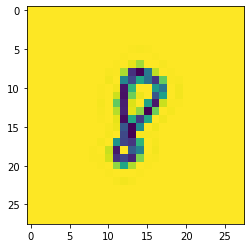

In [127]:
plt.imshow(np.array(cleaned['f3478_49']['x'][2]).reshape(28,28))

In [ ]:
complete_data = data.copy()
for username in users:
    complete_data[username]['x'].extend(data_test[username]['x'])
    complete_data[username]['y'].extend(data_test[username]['y'])

In [121]:
output = {} 
output['user_data'], output['cluster_ids'] = clean(test_data)
output['users'] = users_fixed
with open('femnist-data-clustered/test/data.json', 'w') as file: 
    json.dump(output, file)

In [122]:
output = {} 
output['user_data'], output['cluster_ids'] = clean(data)
output['users'] = users_fixed
with open('femnist-data-clustered/train/data.json', 'w') as file: 
    json.dump(output, file)